## Importing related library

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

LABELS = ["Normal", "Fraud"]

In [3]:
dataset = pd.read_csv("./Dataset/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
features = dataset.iloc[:,]
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(dataset.shape)

(284807, 31)


## To check whether any value of cell is empty or not

In [6]:
dataset.isnull().values.any()

False

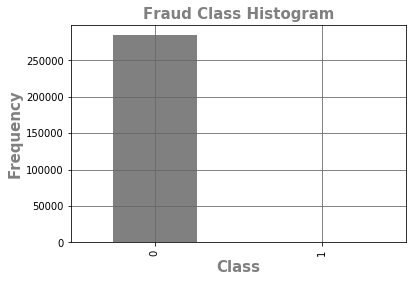

In [7]:
classes_count = pd.value_counts(dataset['Class'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Fraud Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Class', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [8]:
# from imblearn.over_sampling import SMOTE as sm
# x_sampled , y_sampled = sm().fit_resample(dataset)
# from collections import Counter ## separate collection for 0 and 1 
# print(sorted(Counter(y_sampled).items()))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset['normalize_amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
# dataset['normalize_time'] = scaler.fit_transform(dataset['Time'].values.reshape(-1,1))


In [10]:
dataset = dataset.drop(['Time'], axis = 1)
dataset = dataset.drop(['Amount'], axis = 1)

In [12]:
features = dataset.iloc[:, dataset.columns != 'Class']
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalize_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [14]:
label = dataset.iloc[:, dataset.columns == 'Class']
label.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [22]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state= 42)
x_Sampled,y_Sampled = sm.fit_sample(features,label.values.ravel())
from collections import Counter ## separate collection for 0 and 1 
print(sorted(Counter(y_Sampled).items()))

[(0, 284315), (1, 284315)]


In [ ]:
dataset.head()

In [26]:
X_feature, X_target, y_feature, y_target = train_test_split(x_Sampled,y_Sampled, test_size = 0.2 , random_state = 42)




In [27]:
X_feature = X_feature.values
X_target = X_target.values

In [28]:
X_feature.shape

(454904, 29)

In [29]:
X_target.shape

(113726, 29)

In [30]:
# dataset.head()

In [31]:
input_dim = X_feature.shape[1]
input_dim

29

In [32]:
encoding_dim = 14

In [33]:
hidden_dim = int(encoding_dim / 2)
hidden_dim

7

In [34]:
learning_rate = 1e-5

In [35]:
input_layer = Input(shape= (input_dim,))

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)

In [36]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 29)                232       
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [37]:
autoencoder.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                    metrics = ['accuracy'])
checkpointer = ModelCheckpoint(filepath = 'autoencoder.h5',verbose = 0, save_best_only = True)

tensorboard = TensorBoard(log_dir= '.logs',
                         histogram_freq = 0,
                         write_graph = True,
                         write_images =True)

history = autoencoder.fit(X_feature, X_feature,epochs = 100, batch_size = 30, shuffle = True,
                          validation_data = (X_target, X_target),
                          verbose = 1,
                          callbacks = [checkpointer, tensorboard]).history
load_model('autoencoder.h5')

Train on 454904 samples, validate on 113726 samples
Epoch 1/100
454904/454904 [==============================] - 31s 68us/step - loss: 12.0141 - accuracy: 0.5724 - val_loss: 11.9220 - val_accuracy: 0.6358
Epoch 2/100
454904/454904 [==============================] - 29s 63us/step - loss: 11.7785 - accuracy: 0.6647 - val_loss: 11.8994 - val_accuracy: 0.6777
Epoch 3/100
454904/454904 [==============================] - 30s 66us/step - loss: 11.7641 - accuracy: 0.6856 - val_loss: 11.8877 - val_accuracy: 0.7022
Epoch 4/100
454904/454904 [==============================] - 30s 67us/step - loss: 11.7486 - accuracy: 0.7081 - val_loss: 11.8699 - val_accuracy: 0.7185
Epoch 5/100
454904/454904 [==============================] - 31s 67us/step - loss: 11.7414 - accuracy: 0.7147 - val_loss: 11.8725 - val_accuracy: 0.7153
Epoch 6/100
454904/454904 [==============================] - 29s 65us/step - loss: 11.7376 - accuracy: 0.7164 - val_loss: 11.8636 - val_accuracy: 0.7119
Epoch 7/100
454904/454904 [===

Epoch 54/100
454904/454904 [==============================] - 29s 63us/step - loss: 11.7202 - accuracy: 0.7440 - val_loss: 11.8592 - val_accuracy: 0.7424
Epoch 55/100
454904/454904 [==============================] - 29s 64us/step - loss: 11.7202 - accuracy: 0.7436 - val_loss: 11.8491 - val_accuracy: 0.7366
Epoch 56/100
454904/454904 [==============================] - 28s 62us/step - loss: 11.7201 - accuracy: 0.7445 - val_loss: 11.8504 - val_accuracy: 0.7477
Epoch 57/100
454904/454904 [==============================] - 28s 62us/step - loss: 11.7200 - accuracy: 0.7450 - val_loss: 11.8855 - val_accuracy: 0.7350
Epoch 58/100
454904/454904 [==============================] - 29s 65us/step - loss: 11.7198 - accuracy: 0.7451 - val_loss: 11.8470 - val_accuracy: 0.7518
Epoch 59/100
454904/454904 [==============================] - 29s 63us/step - loss: 11.7199 - accuracy: 0.7449 - val_loss: 11.8482 - val_accuracy: 0.7382
Epoch 60/100
454904/454904 [==============================] - 28s 63us/step 

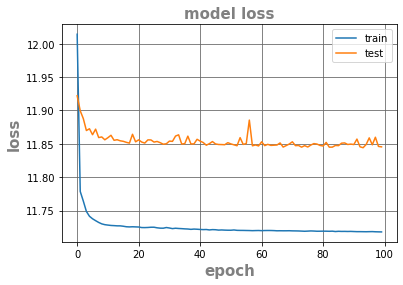

In [39]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss' , fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('loss' ,fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('epoch', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(['train' , 'test'], loc = 'upper right')

In [40]:
predictions = autoencoder.predict(X_target)
predictions.shape

(113726, 29)

In [41]:
mean_squared_error = np.mean(np.power(X_target - predictions, 2), axis =1)
# mean_squared_error
error_df = pd.DataFrame({'error':mean_squared_error, 'true_class':y_target})

In [42]:
error_df.describe()

,error,true_class
count,113726.000000,113726.000000
mean,11.828759,0.500994
std,25.364149,0.500001
min,0.077178,0.000000
25%,0.379438,0.000000
50%,0.919356,1.000000
75%,8.211619,1.000000
max,392.905457,1.000000


In [43]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

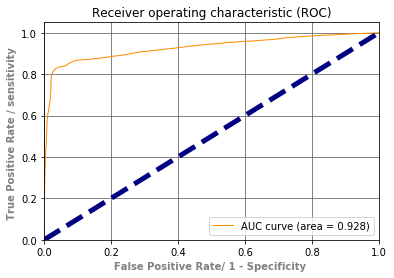

In [44]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.true_class, error_df.error)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.figure()
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=1, label='AUC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/ 1 - Specificity ',  fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('True Positive Rate / sensitivity ' ,  fontweight='bold', fontsize = '10', color = "gray")
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()
# fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.error)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.001, 1])
# plt.ylim([0, 1.001])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show();

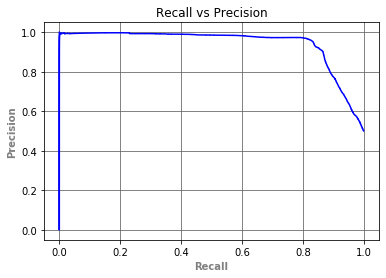

In [45]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall',fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Precision',fontweight='bold', fontsize = '10', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

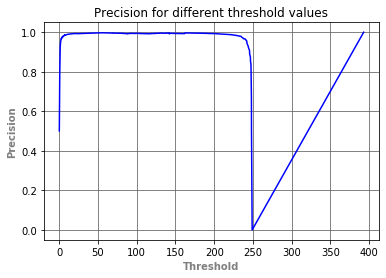

In [46]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold', fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Precision',fontweight='bold', fontsize = '10', color = "gray" )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

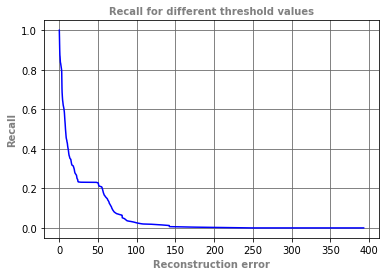

In [47]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values', fontweight='bold', fontsize = '10', color = "gray")
plt.xlabel('Reconstruction error', fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Recall', fontweight='bold', fontsize = '10', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

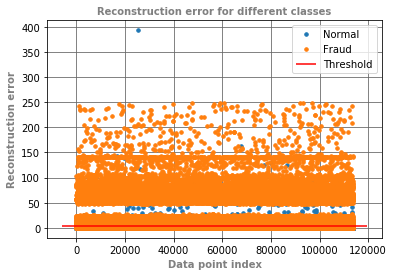

In [48]:
threshold = 2.9

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes", fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel("Reconstruction error", fontweight='bold', fontsize = '10', color = "gray")
plt.xlabel("Data point index", fontweight='bold', fontsize = '10', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show();

In [49]:
y_pred = [1 if e > threshold else 0 for e in error_df.error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[55359,  1391],
       [11171, 45805]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     56750
           1       0.97      0.80      0.88     56976

    accuracy                           0.89    113726
   macro avg       0.90      0.89      0.89    113726
weighted avg       0.90      0.89      0.89    113726



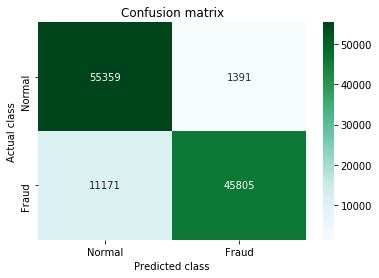

In [53]:
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.BuGn);
plt.title("Confusion matrix")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()